# Intial data exploration

This is the first notebook for the NY Price Estimator demo project, containing initial data exploration and checking the preprocessing operations required to generate a clean dataset for modeling.

In [76]:
import os
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

## Access data from Minio

Raw dataset for the project was uploaded to Minio. From Jupyter and Vscode, we can access it via the mounted `shared-storage` volume:

In [77]:
DIR_REPO = Path.cwd().parent.parent
DIR_MINIO = DIR_REPO.parent.parent / "shared-storage" / "ny-price-estimator" / "data"
DIR_DATA_RAW = Path(DIR_MINIO) / "raw"
DIR_DATA_PROCESSED = Path(DIR_MINIO) / "processed"

In [78]:
os.listdir(DIR_DATA_RAW)

['listings.csv']

^ This is the file as downloaded from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) under the Creative Commons Universal licence (CC0 1.0).

In [79]:
FILEPATH_DATA = DIR_DATA_RAW / "listings.csv"

In [80]:
df_raw = pd.read_csv(FILEPATH_DATA)
df_raw.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39
1,3831,https://www.airbnb.com/rooms/3831,20191204162729,2019-12-07,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.67
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.60
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,3.52


## Explore data processing

In [81]:
df_raw.shape

(50599, 106)

### Select columns

In [82]:
df_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

For an initial model, we are only going to use a small subset of the columns.

In [83]:
COLUMNS = ['id', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'zipcode', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price']

In [84]:
df = df_raw[COLUMNS].copy()
df.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood'}, inplace=True)
df.head()

,id,neighbourhood,property_type,room_type,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price
0,2595,Manhattan,Apartment,Entire home/apt,10018,40.75362,-73.98377,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$225.00
1,3831,Brooklyn,Guest suite,Entire home/apt,11238,40.68514,-73.95976,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00
2,5099,Manhattan,Apartment,Entire home/apt,10016,40.74767,-73.97500,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$200.00
3,5121,Brooklyn,Apartment,Private room,11216,40.68688,-73.95596,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00
4,5178,Manhattan,Apartment,Private room,10019,40.76489,-73.98493,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",$79.00


### Check for missing values

In [85]:
df.isna().sum()

id                 0
neighbourhood      0
property_type      0
room_type          0
zipcode          465
latitude           0
longitude          0
accommodates       0
bathrooms         51
bedrooms          63
beds             132
bed_type           0
amenities          0
price              0
dtype: int64

In [86]:
df = df.dropna(axis=0)

### Check the target variable

In [87]:
# Convert string to numeric
df['price'] = df['price'].str.extract(r"(\d+).")
df['price'] = df['price'].astype(int)

In [88]:
# Summary statistics

df['price'].describe()

count    49917.000000
mean       138.093495
std        111.263327
min          0.000000
25%         67.000000
50%        102.000000
75%        175.000000
max        999.000000
Name: price, dtype: float64

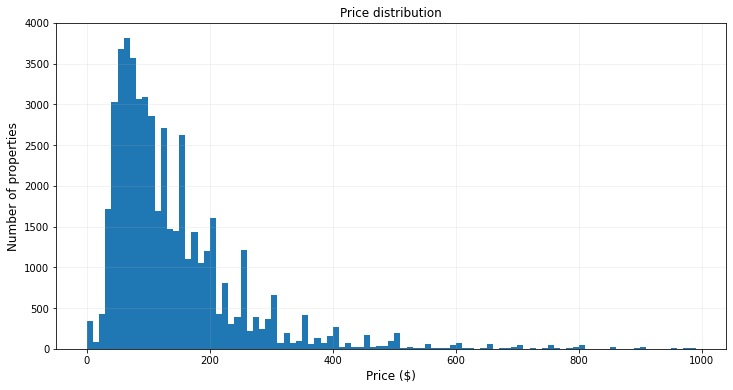

In [89]:
# Plot price distribution

fontsize_labels = 12

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['price'], bins=range(0, max(df['price']), 10))
ax.grid(alpha=0.2)
ax.set_title('Price distribution', fontsize=fontsize_labels)
ax.set_ylabel('Number of properties', fontsize=fontsize_labels)
ax.set_xlabel('Price ($)', fontsize=fontsize_labels)
plt.show()

Remove the listings where price is between \\$0 and \\$10.

In [90]:
df = df[df['price'] >= 10]

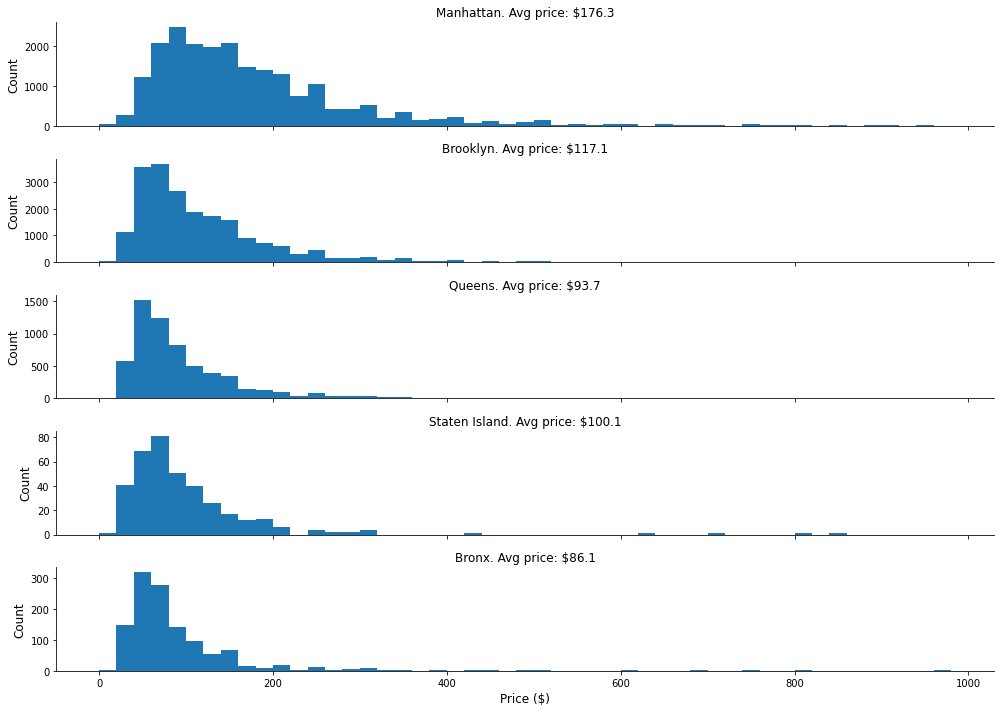

In [91]:
# Break down by neighbourhood:

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(14, 10), sharex=True)

axes = [ax1, ax2, ax3, ax4, ax5]
neighbourhood = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

for i, ax in enumerate(axes):
    values = df[df['neighbourhood'] == neighbourhood[i]]['price']
    avg = round(values.mean(), 1)
    ax.hist(values, bins=range(0, max(df['price']), 20))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{neighbourhood[i]}. Avg price: ${avg}', fontsize=fontsize_labels)
    ax.set_ylabel('Count', fontsize=fontsize_labels)

ax.set_xlabel('Price ($)', fontsize=fontsize_labels)

plt.tight_layout()
plt.show()

In [92]:
# Create a categorical price column corresponding to Low ($0-$90), Mid ($90-$180), High ($180-$400) and Luxury ($400+) properties

df['category'] = pd.cut(df['price'], bins=[10, 90, 180, 400, np.inf], labels=[0, 1, 2, 3])
df.head()

,id,neighbourhood,property_type,room_type,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,category
0,2595,Manhattan,Apartment,Entire home/apt,10018,40.75362,-73.98377,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,2
1,3831,Brooklyn,Guest suite,Entire home/apt,11238,40.68514,-73.95976,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,0
2,5099,Manhattan,Apartment,Entire home/apt,10016,40.74767,-73.97500,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2
4,5178,Manhattan,Apartment,Private room,10019,40.76489,-73.98493,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",79,0
5,5203,Manhattan,Apartment,Private room,10025,40.80178,-73.96723,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",79,0


In [93]:
df['category'].value_counts()

0    20354
1    17927
2     9851
3     1392
Name: category, dtype: int64

### Extract column information for amenities

In [94]:
def preprocess_amenities_column(df: DataFrame) -> DataFrame:
    
    df['TV'] = df['amenities'].str.contains('TV')
    df['TV'] = df['TV'].astype(int)
    df['Internet'] = df['amenities'].str.contains('Internet')
    df['Internet'] = df['Internet'].astype(int)
    df['Air_conditioning'] = df['amenities'].str.contains('Air conditioning')
    df['Air_conditioning'] = df['Air_conditioning'].astype(int)
    df['Kitchen'] = df['amenities'].str.contains('Kitchen')
    df['Kitchen'] = df['Kitchen'].astype(int)
    df['Heating'] = df['amenities'].str.contains('Heating')
    df['Heating'] = df['Heating'].astype(int)
    df['Wifi'] = df['amenities'].str.contains('Wifi')
    df['Wifi'] = df['Wifi'].astype(int)
    df['Elevator'] = df['amenities'].str.contains('Elevator')
    df['Elevator'] = df['Elevator'].astype(int)
    df['Breakfast'] = df['amenities'].str.contains('Breakfast')
    df['Breakfast'] = df['Breakfast'].astype(int)

    df.drop('amenities', axis=1, inplace=True)
    
    return df


df = preprocess_amenities_column(df)
df.head()

,id,neighbourhood,property_type,room_type,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,...,price,category,TV,Internet,Air_conditioning,Kitchen,Heating,Wifi,Elevator,Breakfast
0,2595,Manhattan,Apartment,Entire home/apt,10018,40.75362,-73.98377,1,1.0,0.0,...,225,2,1,0,1,1,1,1,0,0
1,3831,Brooklyn,Guest suite,Entire home/apt,11238,40.68514,-73.95976,3,1.0,1.0,...,89,0,1,1,1,1,1,1,0,0
2,5099,Manhattan,Apartment,Entire home/apt,10016,40.74767,-73.97500,2,1.0,1.0,...,200,2,1,1,1,1,1,1,0,0
4,5178,Manhattan,Apartment,Private room,10019,40.76489,-73.98493,2,1.0,1.0,...,79,0,1,0,1,0,1,1,0,0
5,5203,Manhattan,Apartment,Private room,10025,40.80178,-73.96723,1,1.0,1.0,...,79,0,0,1,1,0,1,1,1,1


This is the processed data that we will be using in the first instance for modeling.

## Preprocessed dataset creation

In principle, we could save the above-created dataset from Jupyter directly, but that can create problems: the processed dataset could easily change upon rerunning an altered version of the notebook, without keeping track of the code that generated different versions of it. Instead, in order to maintain full traceability and reproducibility, we convert the code to a .py script and run it on the Drone agents. This way, the processed dataset is associated with a specific Drone run and with the exact version of the code that generated it, creating a fully reproducible pipeline:

- The preprocessing code is rewritten as a clean .py script in Vscode (`lab/processes/preprocess_data/main.py`).
- The code is sent for execution on Drone agents using a .drone.yml file (`.drone.yml`)
- The execution of the preprocessing code can be inspected in the [Drone interface](https://kdlapp.kdl-demo.konstellation.io/#/projects/ny-price-estimator/tool/drone). The execution is associated with a specific commit or tag and can be reproduced at will.
- The results are persisted in the corresponding S3 bucket on Minio (in `shared-volume/ny-price-estimator/data/processed`)